# Introduction

   The issue of hiring and keeping the most suitable employees is an old but vital problem. Finding the key factors lead to attrition is a good approach to find the solution. In this report, using this dataset: IBM HR Analytics Employee Attrition & Performance, I will try to answer the three following questions: 
    
    1. What are key factors that are playing into current attrition rates? 
    2. What are key factors that are playing into satisfaction rates?
    3. When are employees leaving?
    
   Before answering those questions, I will describe and visualize the data. Based on that, I'll give my predictions about the key factors and use Hypothesis testing to check if they are valid or not. Then I'll give a brief conclusion. 
    
   You can find the dataset here: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
    
 
    

In [2]:
import pandas as pd #data processing, CSV file I/O
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import chi2_contingency
from scipy import stats

## 1. Exploratory Data Analysis

In [3]:
data = pd.read_csv(r"C:\Users\tctha\OneDrive\Documents\cbd\data.csv") #insert the CSV file to get data.
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Investigating the first five rows of the dataframe, we know that each row represented an employee and his/her information. We have 35 columns. After giving a glance at the name of those columns, I believe some of them are not needed to answer our questions: EmployeeCount, EmployeeNumber. I also suspect the StandardHours is not a vital one since all of the first five rows have the same value in this column (80).

To understand the data better, we need to understand the meaning of values in some columns like: Education, EnvironmentSatisfaction... 

The numbers in Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance are category variables. 

***
***

I copy this description from the data source: 

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [4]:
data.shape

(1470, 35)

There are 1470 observations. 

In [5]:
display(data.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

***
There is no missing data in the data set. 

In [6]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

***
We only have two data types in the dataset: int64 and object. 

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


***
Have a quick look at the discription above, I detect no unusual discriptive statistic value. 

In [15]:
Attrition.shape

(237, 35)

In [16]:
NotAttrition.shape

(1233, 35)

The Attrition has 237 observations. It means that we have 237 employees who have quit their jobs. The NotAttrition has 1233 observations. It means that we have 1233 employees working for the company at that time. 

## 2. Visualization

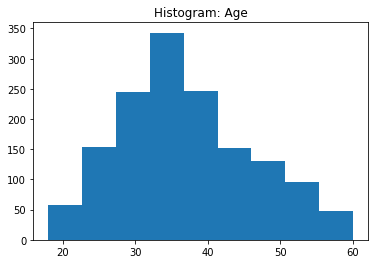

In [15]:
bins = np.linspace(18, 60, 10)
pyplot.hist(data['Age'],bins)
pyplot.title('Histogram: Age')
pyplot.show()


The histogram above shows us the distribution of the age. We can see that most of the employees are around 30 and 40 years old. 

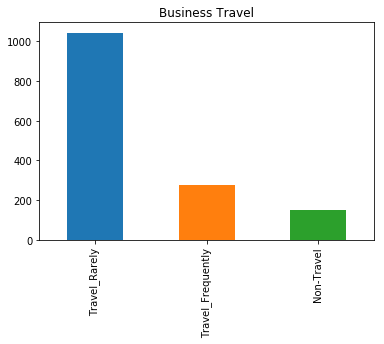

In [44]:
data['BusinessTravel'].value_counts().plot(kind='bar', title = 'Business Travel')

The bar chart shows us that most of the employees travel rarely. 

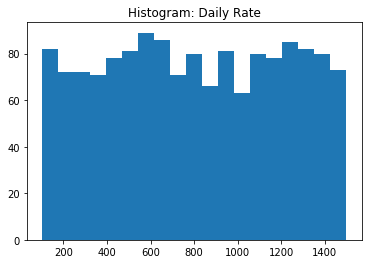

In [16]:
bins = np.linspace(102, 1499, 20)
pyplot.hist(data['DailyRate'],bins)
pyplot.title('Histogram: Daily Rate')
pyplot.show()

The above histogram shows us the distribution of the daily rate. 

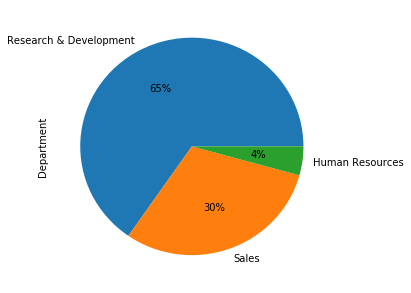

In [26]:
data['Department'].value_counts().plot(kind='pie',figsize=(5,5), autopct='%1.0f%%')

Nearly one third of the employees work in Research and Developement. A few staffs work in the Human Resources apartment. 

In [47]:
data['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

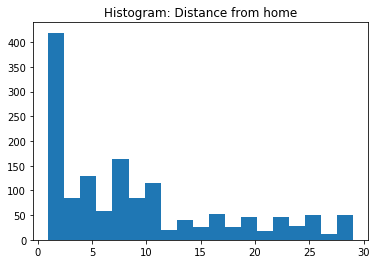

In [17]:
bins = np.linspace(1, 29, 20)
pyplot.hist(data['DistanceFromHome'],bins)
pyplot.title('Histogram: Distance from home')
pyplot.show()

Most of the employees live near the company. 

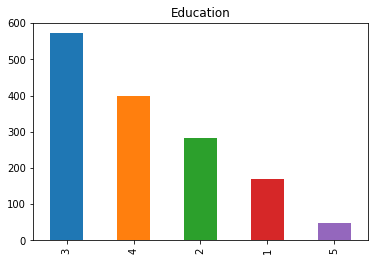

In [54]:
data['Education'].value_counts().plot(kind='bar', title = 'Education')

Most of the employees have a bachelor or master degree. A few of them did not go to college. Very few of them have a doctor degree. 

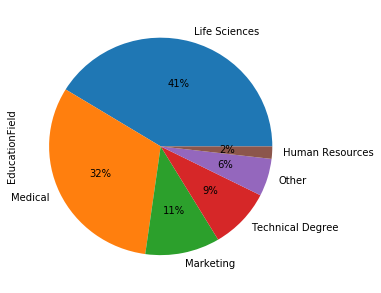

In [56]:
data['EducationField'].value_counts().plot(kind='pie',figsize=(5,5), autopct='%1.0f%%')

Most of the employees study in Life Sciences and Medical. Very few of them (only 2%) work in Human Resources field. 

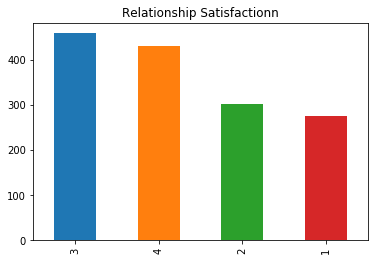

In [57]:
data['RelationshipSatisfaction'].value_counts().plot(kind='bar', title = 'Relationship Satisfaction')

Most of the employees have high and very high satisfaction but there are around 300 ones have problem with this one.

## 3. Analysis

### Age and Attrition

In [5]:
Attrition = data.loc[data.Attrition == 'Yes']
NotAttrition = data.loc[data.Attrition == 'No']

We separate the dataset into two smaller ones, the first one with all the "Yes" in the Attrition column, and the latter contains all the rows with "No" in the Attrition column. 

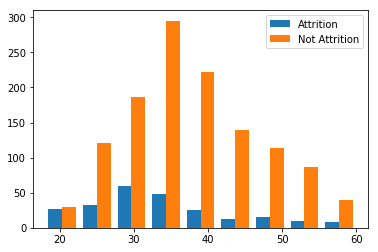

In [4]:
bins = numpy.linspace(18, 60, 10)
pyplot.hist([Attrition['Age'],NotAttrition['Age']], bins, label = ['Attrition','Not Attrition'])
pyplot.legend(loc='upper right')
pyplot.show()

The graph above shows us the histograms (age) of the Attrition and Not Attrition datasets on the same axis. 


In my observation, I split the employees into three groups: younger than 25, from 25 to 40, and older than 40. I believe that most of people who quit their jobs are ***around 25 to 40***, since in this age people tend to change their job or career path. For the youngers, they still do the internship and for the older they do not want to change. I'll use a hypothesis test to check my opinion.

<font color=red>Hypothesis Testing</font>
<br>
<br>
***Null Hypothesis***: There is no association between age and atrittion.
<br>
***Alternative hypothesis***: There is association between age and atrittion. 
<br>
<br>
I'll use the Chi-square test for independence. Let the alpha level be 0.05. The attrition is already a categorical variable. I exchange age into a categorical variable as well. We split the employees into three group based on their age: below 25, between 25 and 40, over 40. 
<br>


In [7]:
ageAttrition = Attrition['Age']

In [9]:
ageAttrition = pd.cut(ageAttrition,bins=[0,25,40,60])

In [50]:
count = ageAttrition.value_counts()

In [17]:
count

(25, 40]    141
(40, 60]     52
(0, 25]      44
Name: Age, dtype: int64

In [25]:
ageNotAttrition = NotAttrition['Age']

In [26]:
ageNotAttrition = pd.cut(ageNotAttrition,bins=[0,25,40,60])

In [38]:
count1 = ageNotAttrition.value_counts()

In [39]:
count1

(25, 40]    741
(40, 60]    413
(0, 25]      79
Name: Age, dtype: int64

In [51]:
obs = np.array([[count[1],count[21],count[41]],[count1[1],count1[21],count1[41]]])

In [53]:
chi2_contingency(obs,correction=True)

(61.516993701216116,
 4.382829197256708e-14,
 2,
 array([[ 24.21940928,  24.21940928,  91.56118143],
        [ 98.78059072,  98.78059072, 373.43881857]]))

In [56]:
chi2_contingency(obs,correction=True)[1] < 0.01

True

Since the p-value of the chi-square test is less than the alpha level, we reject the null hypothesis. 
<br>
So ***there is an association between age and attrition***.

### Distance from Home and Attrition.

In [6]:
Attrition['DistanceFromHome'].describe()

count    237.000000
mean      10.632911
std        8.452525
min        1.000000
25%        3.000000
50%        9.000000
75%       17.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

In [7]:
NotAttrition['DistanceFromHome'].describe()

count    1233.000000
mean        8.915653
std         8.012633
min         1.000000
25%         2.000000
50%         7.000000
75%        13.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

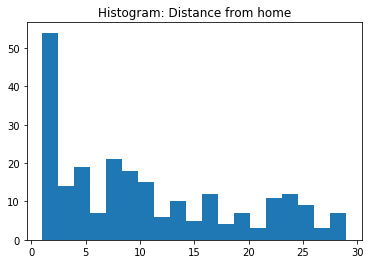

In [18]:
bins = np.linspace(1, 29, 20)
pyplot.hist(Attrition['DistanceFromHome'],bins)
pyplot.title('Histogram: Distance from home')
pyplot.show()

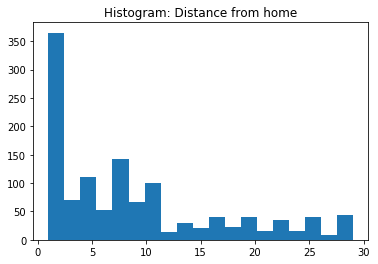

In [19]:
bins = np.linspace(1, 29, 20)
pyplot.hist(NotAttrition['DistanceFromHome'],bins)
pyplot.title('Histogram: Distance from home')
pyplot.show()

In my observation, the percentage of far away in the attrition group is higher. I think that this might be one of the factor of attrition. The mean of distance from home in attrition group is also higher than the one in the not attrition one. I want to check this one happening by chance or not. I'll use the t-test in this situation. 
<br>
<font color=red>Hypothesis Testing</font>
<br>
<br>
***Null Hypothesis***: The average value of distance from home in Attrition group is equal to the one in Not Attrition group.
<br>
***Alternative hypothesis***: The average value of distance from home in Attrition group is not equal to the one in Not Attrition group. 
<br>
We set the alpha value to be 0.05


In [24]:
stats.ttest_ind(Attrition['DistanceFromHome'],NotAttrition['DistanceFromHome'])

Ttest_indResult(statistic=2.994708098265125, pvalue=0.0027930600802134266)

Since pvalue is less than 0.05 then we can reject the null hypothesis. 
<br>
We can conclude that distance from home in Attrition group seems to be larger than the one in Not Attrition group. And distance from home is a key factor in attrition. 

In [4]:
data['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [27]:
I1 = data.loc[data['JobInvolvement'] == 1]#['JobSatisfaction' == 1]
I1S1 = I1.loc[I1['JobSatisfaction'] == 3]
I1S1['JobSatisfaction'].value_counts()[3]

28

In [28]:
#obs = np.array[]
#for i in range(1,5):
    #for j in range(1,6):
        #A[i] = data.loc[data['JobInvolvement'] == i].loc[I1['JobSatisfaction'] == j]['JobSatisfaction'].value_counts()[j]

IndexError: list index out of range

Vì không kịp thời gian và mắc kẹt phần code chỗ này một chút nên em xin trình bày sơ ý tưởng phần tiếp theo như sau:
<br>
1. Tiếp tục dùng chi bình phương để kiểm định mối quan hệ giữa jobinvolvement và job satisfaction. 
2. Với câu hỏi có ai sẽ nghỉ việc tiếp theo, lập một dataframe với các factor đã xét và kiểm định rằng có liên quan đến attrition: như trong bài của em phía trên bao gồm tuổi từ 25 - 40 và có distance from home lớn (có thể chọn > 10). Ngoài ra có thể xét thêm các key factor khác như JobSatisfaction có liên quan đến Attrition. 